In [5]:
#from numpy import *
import numpy as np
import matplotlib.pylab as plt
% matplotlib notebook

In [28]:
m_dot_edd = 1.2e5  # g cm^{-2} s^{-1} from Linares 2012
L_edd = 2.5e38 # erg s^{-1}
R = 1.0e6 # cm
S_surf = 4*pi*R*R 

In [29]:
MSun = 1.98892e33  # g
sec_in_yr = 315360009
L_IGR_active = 6e37 # erg s^{-1} from Degenaar 2013

In [17]:
L_coef = L_IGR_active/L_edd
print(L_coef)

0.24000000000000002


In [34]:
M_dot_edd = m_dot_edd*S_surf/MSun*sec_in_yr
print(M_dot_edd)

1.5079644737231007e+18


In [33]:
M_dot_IGR = M_dot_edd*L_coef
print(M_dot_IGR)

5.73841091366149e-09


In [9]:
1.2e5*np.pi*R*R*4


1.507964473723101e+18

In [22]:
1.44e+18/2e33*3.15e7

2.2680000000000002e-08

In [8]:
import numpy
from scipy import interpolate
from scipy import integrate

MSun = 1.98892e33 
c = 2.99792458e10  
G = 6.67259e-8 

_star_model = numpy.loadtxt('data/BSK21_1.40.dat', skiprows=1)

_rho = interpolate.interp1d(numpy.log(_star_model[:, 1] * 1e5), numpy.log(_star_model[:, 3]), kind='linear')
_pressure = interpolate.interp1d(numpy.log(_star_model[:, 1] * 1e5), numpy.log(_star_model[:, 2]), kind='linear')
_radii = interpolate.interp1d(numpy.log(_star_model[:, 3]), numpy.log(_star_model[:, 1] * 1e5), kind='linear',fill_value='extrapolate')
_mass = interpolate.interp1d(numpy.log(_star_model[:, 1] * 1e5), numpy.log(_star_model[:, 0] * MSun), kind='linear')
_Phi = interpolate.interp1d(numpy.log(_star_model[:, 1] * 1e5), _star_model[:, 4], kind='linear')
_nb = interpolate.interp1d(numpy.log(_star_model[:, 3]), _star_model[:, 5], kind='linear')
_ne = interpolate.interp1d(numpy.log(_star_model[:, 3]), _star_model[:, 6], kind='linear')
_nm = interpolate.interp1d(numpy.log(_star_model[:, 3]), _star_model[:, 7], kind='linear')


def g_surface():  # surface gravity in 10^14 cm/s^2
    return _g_surface

def star_model():
    return _star_model

def Phi(a):  # dimensionless gravitational potential(radius)
    return _Phi(numpy.log(a))

def rho(a):  # density(radius)
    return numpy.exp(_rho(numpy.log(a)))

def pressure(a):  # Pressure(radius)
    return numpy.exp(_pressure(numpy.log(a)))

def radii(a):  # radius(density)
    return numpy.exp(_radii(numpy.log(a)))

def mass(a):  # mass(radius)
    return numpy.exp(_mass(numpy.log(a)))

In [7]:
r_1 = radii(1e11)
r_2 = radii(1e12)

In [31]:
f = lambda x: 4*numpy.pi*x*x * 5e17 * numpy.exp(2*Phi(x))/ numpy.sqrt(1-2*G*mass(x)/c/c/x)

In [32]:
integrate.quad(f,r_2,r_1)

(1.3908522651573482e+35, 5.8989084004562196e+26)

In [18]:
num = 0
def plot(): 
    

    k_b = 8.617330350e-5
    

    data1 = np.loadtxt('output/cooling_GIPSF_' + str(num+57) + '.dat')[::15,:]
    data2 = np.loadtxt('output/cooling_GIPSF_' + str(num+58) + '.dat')[::15,:]
        

    plt.plot(data1[1:, 1]-1.000200e3, np.log10(data1[1:, 5]),'-',color='red',linewidth='3')
    plt.plot(data2[1:, 1]-1.001000e3, np.log10(data2[1:, 5]), '-',color='blue',linewidth='3')

        
    plt.xscale('log')
    plt.xticks([0.01, 0.1, 1,10,100,1000,10000], fontsize=20)

    plt.xlabel('$\\rm Years \\thinspace  \\thinspace  since  \\thinspace  \\thinspace  '
               'onset \\thinspace  \\thinspace  of  \\thinspace  \\thinspace quiescence$',fontsize=22)
    plt.ylabel('$kT^{\infty}_{\\rm s}$ $\\rm (eV)$',fontsize=22)
    plt.legend(loc='upper right',fontsize=17,scatterpoints=1,frameon=False)
    plt.xlim(0.01,30.1)
    #plt.ylim(80,150)
    plt.show()


<IPython.core.display.Javascript object>


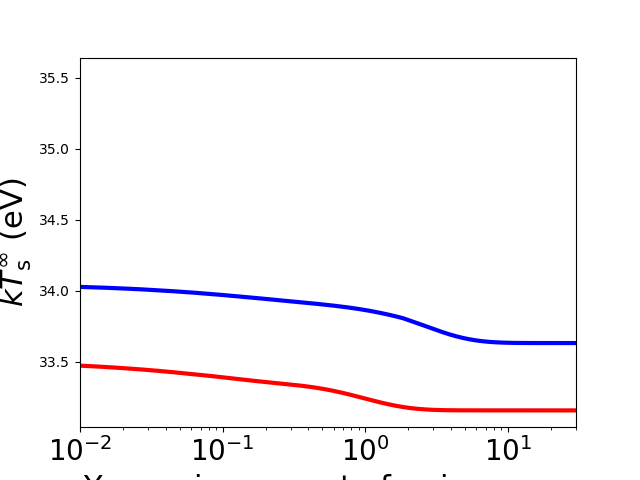

/home/maryhallow/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [19]:
plot()

In [26]:
num = 0
def plot2(): 
    
    plt.figure(2)
    k_b = 8.617330350e-5
    

    data1 = np.loadtxt('output/cooling_GIPSF_' + str(num+57) + '.dat')[::15,:]
    data2 = np.loadtxt('output/cooling_GIPSF_' + str(num+58) + '.dat')[::15,:]
        

    plt.plot(data1[1:, 1]-1.000200e3, np.log10(data1[1:, 3]),'-',color='red',linewidth='3')
    plt.plot(data2[1:, 1]-1.001000e3, np.log10(data2[1:, 3]), '-',color='blue',linewidth='3')

        
    #plt.xscale('log')
    #plt.xticks([0.01, 0.1, 1,10,100,1000,10000], fontsize=20)

    plt.xlabel('$\\rm Years \\thinspace  \\thinspace  since  \\thinspace  \\thinspace  '
               'onset \\thinspace  \\thinspace  of  \\thinspace  \\thinspace quiescence$',fontsize=22)
    plt.ylabel('$kT^{\infty}_{\\rm s}$ $\\rm (eV)$',fontsize=22)
    plt.legend(loc='upper right',fontsize=17,scatterpoints=1,frameon=False)
    #plt.xlim(0.01,30.1)
    #plt.ylim(80,150)
    plt.show()

<IPython.core.display.Javascript object>


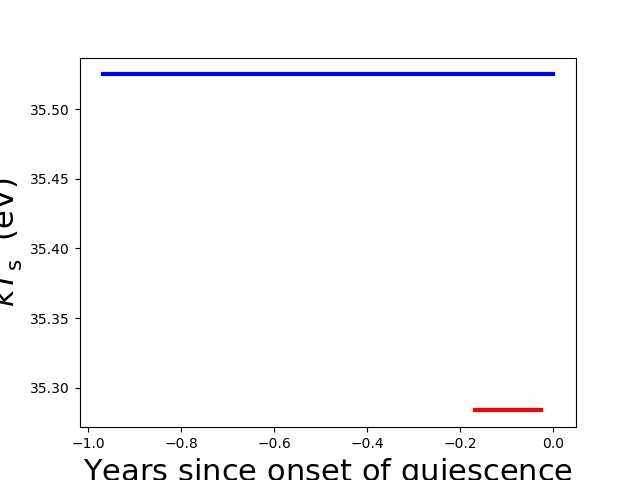

/home/maryhallow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/home/maryhallow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/maryhallow/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [27]:
plot2()

In [28]:
10**35.5

3.162277660168379e+35

In [33]:
10**35.28
import scipy

In [45]:
r_0 = np.array([1.20413015e+06, 1.21000074e+06 , 1.21203074e+06, 1.21269574e+06,  1.21353249e+06, 1.21448985e+06, 1.21486413e+06, 1.21161929e+06])
sigma_g = np.array([4.38291763e+03, 3.97737319e+03, 3.78693639e+03, 3.71309773e+03, 3.60523861e+03, 3.43057815e+03, 3.26194154e+03, 2.68581589e+03])
const_1 = np.array([1.66225679807e16, 1.86808408312e16, 1.98349866253e16, 2.03226874478e16, 2.10820556759e16, 2.2441279112e16, 2.39298439565e16 , 3.80131342314e16])
const_2 = np.array([6.39198181e+04, 6.44242849e+04, 6.47562763e+04, 6.49105274e+04, 6.51666607e+04,  6.56611002e+04, 6.62462312e+04,6.64638989e+04 ])
model_param_arr = np.array([1.40, 1.50, 1.55, 1.57, 1.60, 1.65, 1.70, 1.85])

r_0_f = scipy.interpolate.interp1d(model_param_arr, r_0)
sigma_g_f = scipy.interpolate.interp1d(model_param_arr, sigma_g)
const_1_f = scipy.interpolate.interp1d(model_param_arr, const_1)
const_2_f = scipy.interpolate.interp1d(model_param_arr, const_2)

model_parm = 1.40
H_f = lambda r: const_1_f(model_parm) + const_2_f(model_parm) * 1e17 * np.exp(-(r-r_0_f(model_parm))**2/sigma_g_f(model_parm)**2 / 2)/np.sqrt(2*np.pi*sigma_g_f(model_parm)**2 ) # M_dot = 1e-9 

In [51]:
MSun = 1.98892e33

_star_model = np.loadtxt('data/BSK21_1.40.dat' , skiprows=1)

_rho = interpolate.interp1d(np.log10(_star_model[:, 1] * 1e5), np.log10(_star_model[:, 3]), kind='linear', fill_value='extrapolate')
_pressure = interpolate.interp1d(np.log10(_star_model[:, 1] * 1e5), np.log10(_star_model[:, 2]), kind='linear', fill_value='extrapolate')
_radii = interpolate.interp1d(np.log10(_star_model[:, 3]), np.log10(_star_model[:, 1] * 1e5), kind='linear', fill_value='extrapolate')
_mass = interpolate.interp1d(np.log10(_star_model[:, 1] * 1e5), np.log10(_star_model[:, 0] * MSun), kind='linear', fill_value='extrapolate')
_Phi = interpolate.interp1d(np.log10(_star_model[:, 1] * 1e5), _star_model[:, 4], kind='linear', fill_value='extrapolate')

dV = lambda r: 4*np.pi*r*r/relativity_sqrt(r)

def radii(a):  # radius(density)
    return np.power(10, _radii(np.log10(a)))

def mass(a):  # mass(radius)
    return np.power(10, _mass(np.log10(a)))

def relativity_sqrt(r):
    return np.sqrt(1 - 2*G*mass(r)/(( c ** 2 )*r))

def rho(a):  # density(radius)
    return np.power(10, _rho(np.log10(a)))

<IPython.core.display.Javascript object>


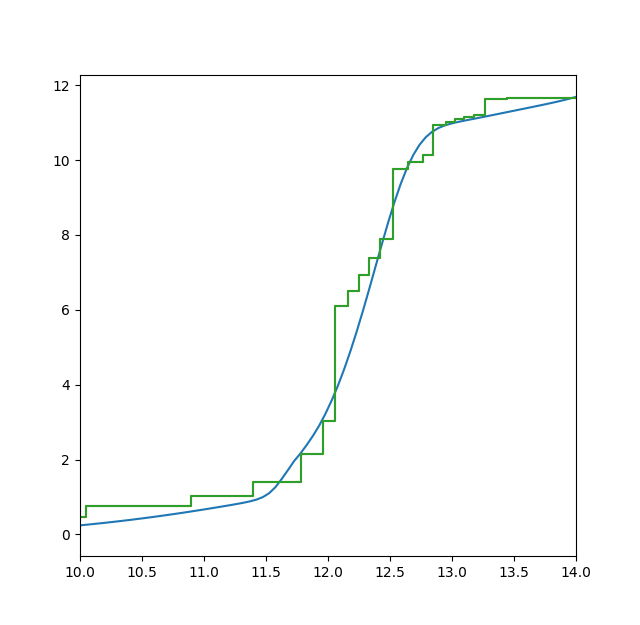

(10, 14)

In [61]:
rho = np.linspace(9,14,100)
r = radii(10**rho)
c = 2.99792458e10
G = 6.67259e-8

check = np.zeros_like(rho)
for i in range(len(check)):
    check[i] = np.abs(np.trapz(H_f(r[:i+1])*np.exp(2*_Phi(np.log10(r[:i+1]))) * dV(r[:i+1]), r[:i+1]))
    
from_ev_to_erg = 1.6021766208e-12
from_yr_to_sec = 31536000
Mn0 = 1.6749286e-24
Mp0 = 1.6726231e-24
Mb = (Mn0 + Mp0) / 2



M_dot = 1e-9 * MSun / from_yr_to_sec # IMPORTANT

data = np.loadtxt('heaters_data.dat')
rho_1 = data[:, 0]
rho_2 = data[:, 0] * (1 + data[:, 2])
y = data[:, 1]

Q_total = (y * 1e3 * from_ev_to_erg) * M_dot / Mb
Q_total_cum = np.cumsum(Q_total)
Q_total_cum = np.append(Q_total_cum,Q_total_cum[-1])
data_plot = np.append(data[:,0],10**15)

plt.figure(3)
plt.plot(rho,check * 10 / 1e35)
plt.step(np.log10(data_plot),Q_total_cum/1e34)
data = np.loadtxt('curve_from_HZ_2008.dat')
plt.step(np.log10(data[:,0]),data[:,1])
plt.xlim(10,14)